In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('/content/Coffe_sales.csv')
data.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  3547
No of col =  11


In [ ]:
#Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
select_col = ['hour_of_day', 'Weekdaysort', 'Monthsort']

In [ ]:
select_col_df = data[['hour_of_day', 'Weekdaysort', 'Monthsort']]
select_col_df = select_col_df.describe()
select_col_df

,hour_of_day,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000
mean,14.185791,3.845785,6.453905
std,4.234010,1.971501,3.500754
min,6.000000,1.000000,1.000000
25%,10.000000,2.000000,3.000000
50%,14.000000,4.000000,7.000000
75%,18.000000,6.000000,10.000000
max,22.000000,7.000000,12.000000


In [ ]:
mean_value = select_col_df.iloc[1:3]
mean_value

,hour_of_day,Weekdaysort,Monthsort
mean,14.185791,3.845785,6.453905
std,4.234010,1.971501,3.500754


In [ ]:
median_value = select_col_df.iloc[3:6]
median_value

,hour_of_day,Weekdaysort,Monthsort
min,6.0,1.0,1.0
25%,10.0,2.0,3.0
50%,14.0,4.0,7.0


<Figure size 500x500 with 0 Axes>

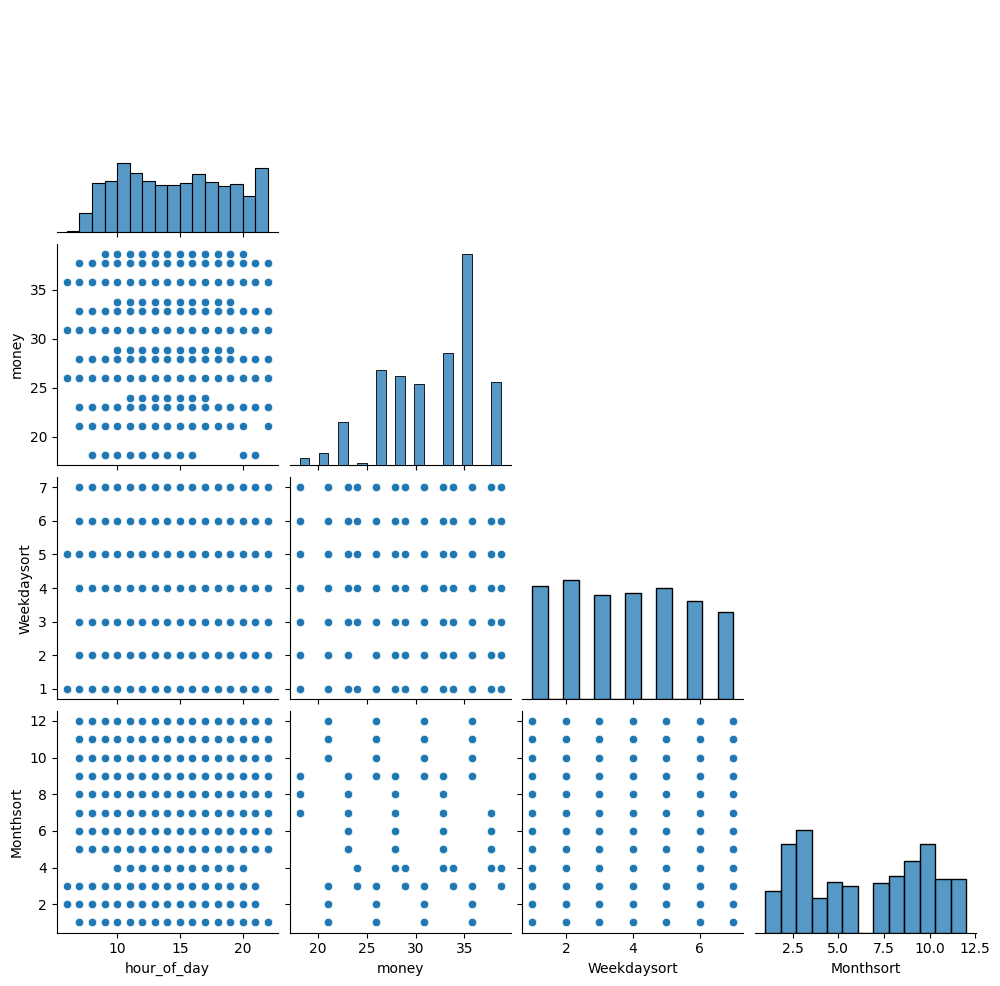

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.pairplot(data=data , corner=True)
plt.show()

In [ ]:
# Replacing the values equal to 0 by the median
select_col = ['hour_of_day', 'Weekdaysort', 'Monthsort']

In [ ]:
print(data['hour_of_day'].median())
print(data['Weekdaysort'].median())
print(data['Monthsort'].median())


14.0
4.0
7.0


In [ ]:
data['hour_of_day'] = data['hour_of_day'].replace(0, data['hour_of_day'].median())
data['Weekdaysort'] = data['Weekdaysort'].replace(0, data['Weekdaysort'].median())
data['Monthsort'] = data['Monthsort'].replace(0, data['Monthsort'].median())


In [ ]:
data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [ ]:
#Calculate the no of different classes

In [ ]:
data['Outcome'].value_counts()

KeyError: 'Outcome'

In [ ]:
#yes = data[data['Outcome'] == 1]
#yes

In [ ]:
# no = data[data['Outcome'] ==0].iloc[0:268]
# no

In [ ]:
# data = pd.concat([yes,no], axis = 0).sample(frac = 1)
# data

In [ ]:
# data = data.rename(columns = {'Yes':'Smoking'})
# data

In [ ]:
data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
corrs = data.corr()
corrs

ValueError: could not convert string to float: 'card'

In [ ]:
corr_data = corrs[corrs['Outcome'] > 0.05]
corr_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.114070,0.178685,0.031975,-0.036391,0.025245,-0.042092,0.545457,0.238184
Glucose,0.114070,1.000000,0.174993,0.168841,0.359931,0.238153,0.129630,0.272474,0.490738
BloodPressure,0.178685,0.174993,1.000000,0.127125,-0.023941,0.287891,-0.020455,0.310268,0.187842
SkinThickness,0.031975,0.168841,0.127125,1.000000,0.254564,0.538910,0.176217,0.051648,0.202540
Insulin,-0.036391,0.359931,-0.023941,0.254564,1.000000,0.174026,0.183122,0.021738,0.137714
BMI,0.025245,0.238153,0.287891,0.538910,0.174026,1.000000,0.152524,0.041018,0.329608
DiabetesPedigreeFunction,-0.042092,0.129630,-0.020455,0.176217,0.183122,0.152524,1.000000,0.011150,0.161766
Age,0.545457,0.272474,0.310268,0.051648,0.021738,0.041018,0.011150,1.000000,0.285012
Outcome,0.238184,0.490738,0.187842,0.202540,0.137714,0.329608,0.161766,0.285012,1.000000


In [ ]:
corrs[corrs['Outcome'] > 0.05].index

NameError: name 'corrs' is not defined

In [ ]:
plt.figure(figsize=(16,9))
corr = corr_data
sns.heatmap(corr, annot=True)
plt.show()


NameError: name 'corr_data' is not defined

<Figure size 1600x900 with 0 Axes>

In [ ]:
#data.drop(['Age'],axis = 1)

In [ ]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

ValueError: could not convert string to float: 'card'

In [ ]:
X_test

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort
1457,21,card,23.02,Americano,Night,Thu,Sep,4
3458,15,card,25.96,Americano,Afternoon,Tue,Mar,2
3260,17,card,35.76,Hot Chocolate,Night,Mon,Mar,1
790,8,card,27.92,Cortado,Morning,Fri,Jun,5
705,11,card,37.72,Hot Chocolate,Morning,Sun,Jun,7
...,...,...,...,...,...,...,...,...
1125,18,card,23.02,Americano,Night,Fri,Aug,5
2123,9,card,30.86,Americano with Milk,Morning,Tue,Nov,2
3367,16,card,35.76,Hot Chocolate,Afternoon,Tue,Mar,2
2934,13,card,35.76,Cocoa,Afternoon,Mon,Feb,1


In [ ]:
Y_test

,Monthsort,Date,Time
1457,9,2024-09-12,21:09:10.412000
3458,3,2025-03-18,15:03:53.426000
3260,3,2025-03-03,17:57:32.688000
790,6,2024-06-28,08:08:35.044000
705,6,2024-06-16,11:01:41.488000
...,...,...,...
1125,8,2024-08-09,18:56:27.712000
2123,11,2024-11-05,09:05:41.810000
3367,3,2025-03-11,16:29:31.062000
2934,2,2025-02-10,13:11:05.976000


In [ ]:
Y_pred = svc.predict(X_test)
Y_pred



ValueError: could not convert string to float: 'card'

In [ ]:
# pd.DataFrame({'Results':list(Y_pred)})

In [ ]:
#test accu
svc_accuracy= round(accuracy_score(Y_test,Y_pred),4)*100 # Accuracy
svc_accuracy

NameError: name 'Y_pred' is not defined

In [ ]:
#train accu
Y_pred = svc.predict(X_train)
svc_accuracy1= round(accuracy_score(Y_train,Y_pred),2)*100 # Accuracy
svc_accuracy1

73.0

#Testing

In [ ]:
d = X_test.iloc[55:56]
d

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort
1162,21,card,27.92,Americano with Milk,Night,Mon,Aug,1


In [ ]:
Y_test.iloc[55:56]

,Outcome
84,1


In [ ]:
Y_pred = svc.predict(X_test.iloc[51:52])
Y_pred

array([1])

In [ ]:
Pregnancies = int(input("Enter Pregnancies = "))
Glucose = int(input("Enter Glucose = "))
BloodPressure = int(input("Enter BloodPressure = "))
SkinThickness = int(input("Enter SkinThickness = "))
Insulin = float(input("Enter Insulin = "))
BMI = float(input("Enter BMI = "))
DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction = "))
Age = int(input("Enter Age = "))

new_data = {'Pregnancies':[Pregnancies],
            'Glucose':[Glucose],
            'BloodPressure':[BloodPressure],
            'SkinThickness':[SkinThickness],
            'Insulin':[Insulin],
            'BMI':[BMI],
            'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
            'Age':[Age]
            }
d = pd.DataFrame(new_data)

Enter Pregnancies = 34
Enter Glucose = 45
Enter BloodPressure = 34
Enter SkinThickness = 56
Enter Insulin = 6
Enter BMI = 34
Enter DiabetesPedigreeFunction = 67
Enter Age = 23


In [ ]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,34,45,34,56,6.0,34.0,67.0,23


In [ ]:
Y_score = svc.predict(d)
print(Y_score)

[0]


[[31 18]
 [22 37]]
yes 59
No 49


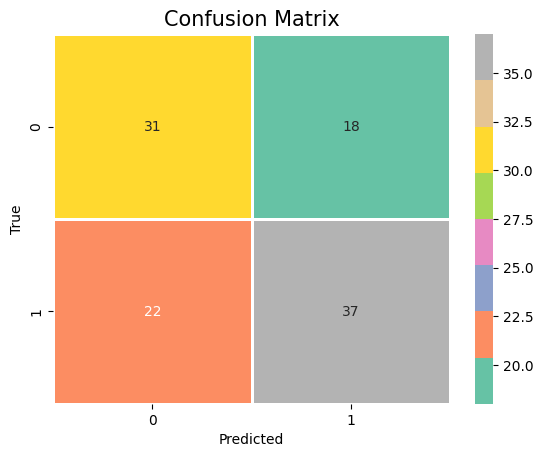

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
Y_pred = svc.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
class_label = [0,1]
print("yes",len(Y_test[Y_test['Outcome'] == True]))
print("No",len(Y_test[Y_test['Outcome'] == False]))
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.63      0.61        49
           1       0.67      0.63      0.65        59

    accuracy                           0.63       108
   macro avg       0.63      0.63      0.63       108
weighted avg       0.63      0.63      0.63       108

